# 目的

## 画像中のノイズを除去する平滑化処理と，画像をくっきりさせる鮮鋭化処理を行う

# 準備

In [1]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ2B/day4"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/JKJ2B/day4
4_1_image/  4_3_image/  day4.ipynb         free_4_1_image/  image/
4_2_image/  4_4_image/  day4_submit.ipynb  free_4_2_image/


In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math
import os
import statistics
from matplotlib import pyplot as pyp

# 確認用関数

指定の箇所から，画像のr値を10コ表示する

In [3]:
def show_red(image, h):
  for w in range(0, 10):
    print(image[h,w,2])

# 課題4-1　3*3メディアンフィルタ(平滑化処理)

3*3メディアンフィルタを用いた平滑化処理を施す．


width= 320, height = 240, bpp = 3


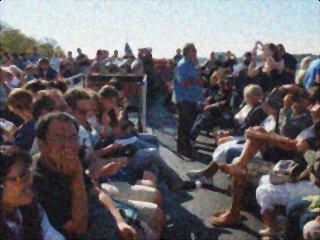

width= 320, height = 240, bpp = 3


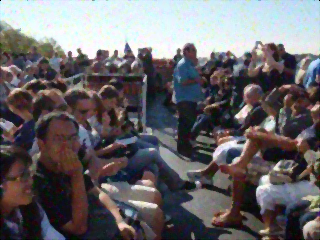

In [10]:
name_list = ['noise_s_whitenoise', 'noise2_s_gomashio']

for name in name_list:
  image = cv2.imread(f'./image/{name}.jpg')

  height, width, channel = image.shape

  # メモリ確保
  image_out = np.zeros([height, width, channel])

  print('width= ' + str(width) + ', height = '+ str(height) + ', bpp = ' + str(channel) )

  for h in range(height):
    for w in range(width):
      for c in range(channel):

        pixel_value = []

        for i in range(3):
          for j in range(3):
            px = w + j - 1
            py = h + i - 1

            # pxとpyがはみ出した場合は，0とする．

            if 0 <= px < width and 0 <= py < height:
              val = image[py, px, c]

            else:
              val = 0

            pixel_value.append(val)



        image_out[h, w, c] = statistics.median(pixel_value)

  # show_red(image_out, 0)


  # 画像の表示
  cv2_imshow(image_out)

上の画像はホワイトノイズが，下の画像はごま塩ノイズが付加されており，それぞれの画像に対して平滑化処理を行った．

# 課題4-2　5*5メディアンフィルタ(平滑化処理)

5*5メディアンフィルタを用いた平滑化処理を施す．

width= 320, height = 240, bpp = 3


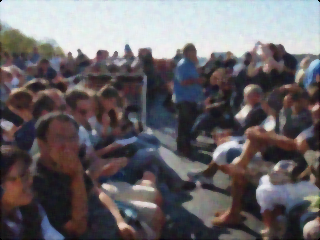

width= 320, height = 240, bpp = 3


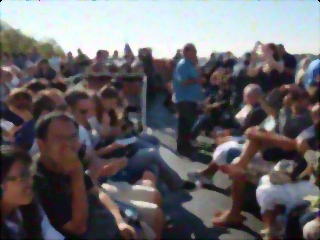

In [11]:
name_list = ['noise_s_whitenoise', 'noise2_s_gomashio']

for name in name_list:
  image = cv2.imread(f'./image/{name}.jpg')

  height, width, channel = image.shape

  # メモリ確保
  image_out = np.zeros([height, width, channel])

  print('width= ' + str(width) + ', height = '+ str(height) + ', bpp = ' + str(channel) )

  for h in range(height):
    for w in range(width):
      for c in range(channel):

        pixel_value = []

        for i in range(5):
          for j in range(5):
            px = w + j - 2
            py = h + i - 2

            # pxとpyがはみ出した場合は，0とする．

            if 0 <= px < width and 0 <= py < height:
              val = image[py, px, c]

            else:
              val = 0

            pixel_value.append(val)



        image_out[h, w, c] = statistics.median(pixel_value)

  # show_red(image_out, 0)


  # 画像の表示
  cv2_imshow(image_out)

上の画像はホワイトノイズが，下の画像はごま塩ノイズが付加されており，それぞれの画像に対して平滑化処理を行った．

# その他の平滑化処理

## 発展1　n*nメディアンフィルタ

n*nメディアンフィルタを用いた平滑化処理を施す．

width= 320, height = 240, bpp = 3


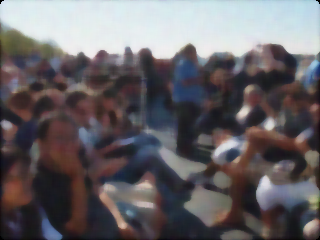

width= 320, height = 240, bpp = 3


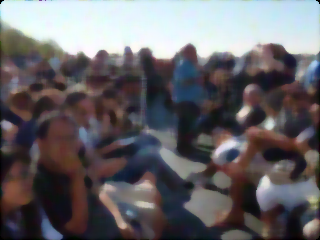

In [12]:
name_list = ['noise_s_whitenoise', 'noise2_s_gomashio']

N = 9

for name in name_list:
  image = cv2.imread(f'./image/{name}.jpg')

  height, width, channel = image.shape

  # メモリ確保
  image_out = np.zeros([height, width, channel])

  print('width= ' + str(width) + ', height = '+ str(height) + ', bpp = ' + str(channel) )

  for h in range(height):
    for w in range(width):
      for c in range(channel):

        pixel_value = []

        for i in range(N):
          for j in range(N):
            px = w + j - N // 2
            py = h + i - N // 2

            # pxとpyがはみ出した場合は，0とする．

            if 0 <= px < width and 0 <= py < height:
              val = image[py, px, c]

            else:
              val = 0

            pixel_value.append(val)



        image_out[h, w, c] = statistics.median(pixel_value)

  # show_red(image_out, 0)


  # 画像の表示
  cv2_imshow(image_out)

上の画像はホワイトノイズが，下の画像はごま塩ノイズが付加されており，それぞれの画像に対して平滑化処理を行った．

## 発展2　5*5移動平均フィルタ

5*5移動平均フィルタを用いた平滑化処理を施す．

width= 320, height = 240, bpp = 3


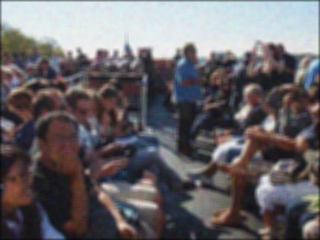

width= 320, height = 240, bpp = 3


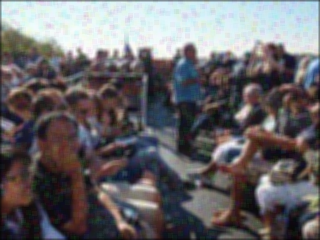

In [13]:
name_list = ['noise_s_whitenoise', 'noise2_s_gomashio']

N = 5 #フィルタサイズ

# 平均値フィルタ用のカーネル
kernel = [
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25],
    [1/25, 1/25, 1/25, 1/25, 1/25]
]

for name in name_list:

  image = cv2.imread(f'./image/{name}.jpg')

  height, width, channel = image.shape

  # メモリ確保
  image_out = np.zeros([height, width, channel])


  print('width= ' + str(width) + ', height = '+ str(height) + ', bpp = ' + str(channel) )

  for h in range(height):
    for w in range(width):
      for c in range(channel):

        sum = 0.0
        for i in range(N):
          for j in range(N):
            px = w + j - N // 2
            py = h + i - N // 2

            # はみ出した場合の例外処理
            if((px < 0) or (py < 0)): continue
            if((px >= width) or (py >= height)): continue

            I = image[py, px, c]
            g = kernel[j][i]

            sum += I * g

        image_out[h, w, c] = sum

  # show_red(image_out, 0)

  # 画像の表示
  cv2_imshow(image_out)

上の画像はホワイトノイズが，下の画像はごま塩ノイズが付加されており，それぞれの画像に対して平滑化処理を行った．


## 発展3　5*5ガウンシアンフィルタ

5*5ガウンシアンフィルタを用いた平滑化処理を施す．

width= 320, height = 240, bpp = 3


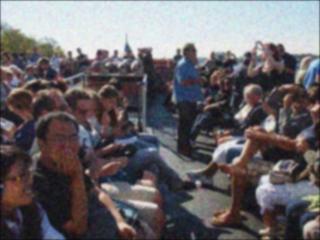

width= 320, height = 240, bpp = 3


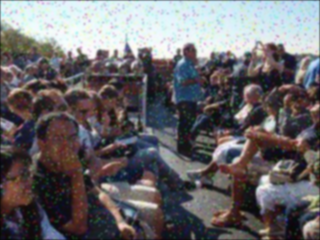

In [14]:
name_list = ['noise_s_whitenoise', 'noise2_s_gomashio']

N = 5 #フィルタサイズ

# 平均値フィルタ用のカーネル
kernel = [
    [1/256, 4/256, 6/256, 4/256, 1/256],
    [4/256, 16/256, 24/256, 16/256, 4/256],
    [6/256, 24/256, 36/256, 24/256, 6/256],
    [4/256, 16/256, 24/256, 16/256, 4/256],
    [1/256, 4/256, 6/256, 4/256, 1/256],
]

for name in name_list:

  image = cv2.imread(f'./image/{name}.jpg')

  height, width, channel = image.shape

  # メモリ確保
  image_out = np.zeros([height, width, channel])


  print('width= ' + str(width) + ', height = '+ str(height) + ', bpp = ' + str(channel) )

  for h in range(height):
    for w in range(width):
      for c in range(channel):

        sum = 0.0
        for i in range(N):
          for j in range(N):
            px = w + j - N // 2
            py = h + i - N // 2

            # はみ出した場合の例外処理
            if((px < 0) or (py < 0)): continue
            if((px >= width) or (py >= height)): continue

            I = image[py, px, c]
            g = kernel[j][i]

            sum += I * g

        image_out[h, w, c] = sum

  # show_red(image_out, 0)

  # 画像の表示
  cv2_imshow(image_out)

上の画像はホワイトノイズが，下の画像はごま塩ノイズが付加されており，それぞれの画像に対して平滑化処理を行った．


# 課題4-3 ラプラシアンフィルタリング(エッジ抽出)

 ラプラシアンフィルタリングを用いたエッジ抽出を行う．

In [8]:
def laplacian(image, kernel):
  height, width, channel = image.shape

  # メモリ確保
  image_out = np.zeros([height, width, channel])


  print('width= ' + str(width) + ', height = '+ str(height) + ', bpp = ' + str(channel) )

  for h in range(height):
    for w in range(width):
      for c in range(channel):
        # 要素数９の配列を確保
        pixel_value = [0]*9

        sum = 0.0
        for i in range(3):
          for j in range(3):
            px = w + j - 1
            py = h + i - 1

            # はみ出した場合の例外処理
            if((px < 0) or (py < 0)): continue
            if((px >= width) or (py >= height)): continue

            I = image[py, px, c]
            g = kernel[j][i]

            sum += I * g

        if sum < 0:
          sum = 0
        elif sum > 255:
          sum = 255

        image_out[h, w, c] = sum

  return image_out



width= 320, height = 240, bpp = 3


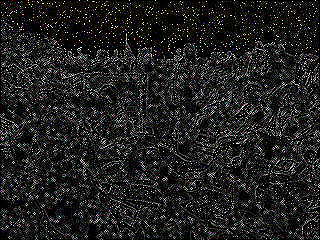

width= 320, height = 240, bpp = 3


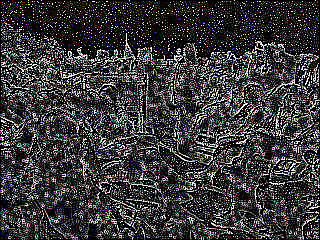

In [21]:
# ラプラシアンフィルタ用のカーネル 4近傍
kernel1 = [
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
]

# ラプラシアンフィルタ用のカーネル 8近傍
kernel2 = [
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
]

kernel_list = [kernel1, kernel2]

image = cv2.imread('./image/noise2_s_gomashio.jpg')

for kernel in kernel_list:
  image_out = laplacian(image, kernel)
  # 画像の表示
  cv2_imshow(image_out)



上の画像は4近傍，下の画像は8近傍ラプラシアンフィルタが適用されており，それぞれのフィルタに対してエッジを強調した画像を出力．





# 必須課題4-4　画像の鮮鋭化処理

先鋭化処理

width= 320, height = 240, bpp = 3


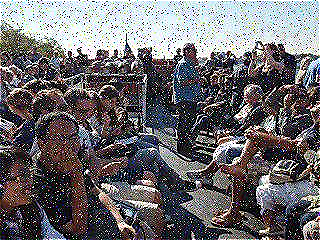

width= 320, height = 240, bpp = 3


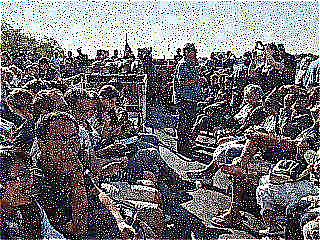

In [22]:
# ラプラシアンフィルタ用のカーネル 4近傍
kernel1 = [
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
]

# ラプラシアンフィルタ用のカーネル 8近傍
kernel2 = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]


kernel_list = [kernel1, kernel2]

image = cv2.imread('./image/noise2_s_gomashio.jpg')

for kernel in kernel_list:
  image_out = laplacian(image, kernel)
  # 画像の表示
  cv2_imshow(image_out)





上の画像は4近傍，下の画像は8近傍先鋭化フィルタを用いて先鋭化した画像．

# 発展4　cannyエッジ検出



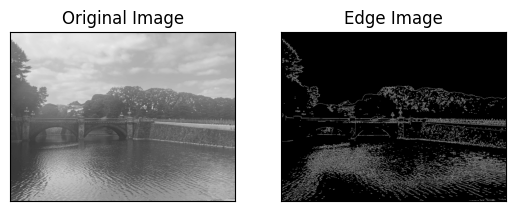

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./image/koukyo.JPG',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()